In [184]:
import pandas as pd
import datetime as dt
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [22]:
users = pd.read_csv('takehome_users.csv',encoding='latin1', parse_dates = True)
engagement = pd.read_csv('takehome_user_engagement.csv', encoding='latin1', parse_dates = True)

In [35]:
user_engagement = users.merge(engagement, left_on='object_id', right_on='user_id')
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement['creation_time'] = pd.to_datetime(user_engagement.creation_time)

In [36]:
user_engagement.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1


In [37]:
user_engagement.nunique()

object_id                       8823
creation_time                   8821
name                            8453
email                           8810
creation_source                    5
last_session_creation_time      8821
opted_in_to_mailing_list           2
enabled_for_marketing_drip         2
org_id                           417
invited_by_user_id              2229
time_stamp                    207220
user_id                         8823
visited                            1
dtype: int64

In [38]:
user_engagement.sort_values('user_id')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1
14,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04,2,1
13,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-13 03:45:04,2,1
12,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-09 03:45:04,2,1
11,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-16 03:45:04,2,1
10,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-13 03:45:04,2,1
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-09 03:45:04,2,1
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-02-08 03:45:04,2,1
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-01-08 03:45:04,2,1
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-31 03:45:04,2,1


In [143]:
#need to add a feature to distinguish adopted users
adopted_users = {}
for user in unique_users:
    dates = user_engagement[user_engagement.user_id == user].time_stamp
    #drop non-unique dates
    no_hours = [i.date() for i in dates]
    dropped = pd.Series(no_hours).drop_duplicates()   
    adopted = 0
    if(len(dates) < 3):
        continue
    else:
        adopted = 0
        for i in range(len(dropped)-2):
            delta1 = dropped.iloc[i+2]-dropped.iloc[i]
            delta2 = dropped.iloc[i+1]-dropped.iloc[i]
            if((delta1+delta2).days <= 27):
                adopted = 1
                break
    adopted_users[user] = adopted     
user_engagement['adopted'] = user_engagement.user_id.map(adopted_users).fillna(0)

In [148]:
user_engagement.adopted.value_counts()

1.0    200185
0.0      7732
Name: adopted, dtype: int64

In [153]:
#convert creation sources into binary data using dummies
user_engagement = pd.concat([user_engagement, pd.get_dummies(user_engagement.creation_source)], axis=1)
user_engagement.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,1.0,0,1,0,0,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,1.0,0,1,0,0,0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1,1.0,0,1,0,0,0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1,1.0,0,1,0,0,0


In [382]:
#create two different dataframes so that populations between adopted and 'abandonded' users can be compared.
adopted = user_engagement[user_engagement.adopted == 1]
abandonded = user_engagement[user_engagement.adopted == 0]

Existing features that are interesting:
    - Creation Time (was there a recruiting event at a certain time? How successful was it)
    - How was the account created? (Are certain creation users more likely to keep users?)
    - mailing list and marketing drip (Do these services improve user retention)
    - was the user invited? (Do invitations matter?)
    - What organization id does the user have?
    
Ideas that may be important but I chose not to pursue due to time constraints:
    - Email services: gmail, yahoo, gustr, etc. (Are certain emails more likely to contribute to adoption)
    - For users with multiple visits does the closeness of the first two interactions affect adoption.
    - Minimum time between visits? Maximum Time between visits?

Chi-squared: 209.07690696951428, P-value: 1.0181744496852156e-20


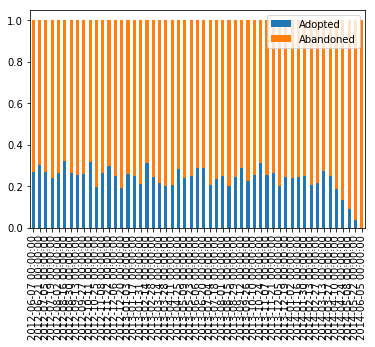

In [446]:
#Null Hypothesis: Sign-up date has no correlation to adoption rate REJECTED
creation_dates = user_engagement.drop_duplicates('user_id').creation_time
creation_dates = [i.round('14D') for i in creation_dates]
ordered_hist = pd.Series(creation_dates).value_counts().sort_index()

adoption_dates = adopted.drop_duplicates('user_id').creation_time
adoption_dates =[i.round('14D') for i in adoption_dates] #group creation times into 2 week periods
adopt_ordered_hist = pd.Series(adoption_dates).value_counts().sort_index()

abandon_dates = abandonded.drop_duplicates('user_id').creation_time
abandon_dates = [i.round('14D') for i in abandon_dates]
abandon_hist = pd.Series(abandon_dates).value_counts().sort_index()

creation_df = pd.DataFrame([ordered_hist, adopt_ordered_hist, abandon_hist]).T
creation_df.columns = (['Total', 'Adopted','Abandoned'])
#creation_df['Adopted'] = creation_df['Adopted']/creation_df['Total']
#creation_df['Abandoned'] = creation_df['Abandoned']/creation_df['Total']
creation_df = creation_df.fillna(0)
chi2, p, dof, expected = chi2_contingency([list(creation_df.Adopted), list(creation_df.Abandoned)])
print("Chi-squared: {}, P-value: {}".format(chi2,p))
creation_percent = (creation_df.T/creation_df.Total).T
creation_percent.drop('Total', axis=1).plot.bar(stacked=True)
plt.show()

Chi-squared: 36.27645334452629, P-value: 2.538457746182441e-07


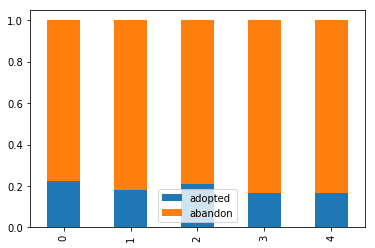

In [445]:
#Null Hypothesis: Account Creation Type does not affect Adoption REJECTED
source_df = user_engagement.drop_duplicates('user_id').groupby('creation_source').sum()
source_adopt = source_df.adopted.reset_index()['adopted']
source_abandon = pd.Series([source_df.GUEST_INVITE.max(), source_df.ORG_INVITE.max(), 
                       source_df.PERSONAL_PROJECTS.max(), source_df.SIGNUP.max(), source_df.SIGNUP_GOOGLE_AUTH.max()])
source_abandon = source_abandon.reset_index()[0]
source_count = pd.concat([source_adopt, source_abandon], axis=1)
source_count.columns = ['adopted', 'abandon']
source_count['total'] = source_count.adopted + source_count.abandon
source_count
chi2, p, dof, expect = chi2_contingency([list(source_count.adopted), list(source_count.abandon)])
print("Chi-squared: {}, P-value: {}".format(chi2,p))
source_percent = (source_count.T/source_count.total).T
source_percent.drop('total', axis=1).plot.bar(stacked=True)
plt.show()

Chi-squared: 13.423102089839425, P-Value: 0.00024854435051756117


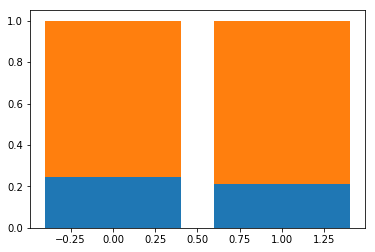

In [423]:
#Null Hypothesis: Being Invited does not affect adoption rate REJECTED
invite_adopt , nonvite_adopt = (adopted.groupby('user_id').count().invited_by_user_id > 0).value_counts()
invite_abandon, nonvite_abandon = (abandonded.groupby('user_id').count().invited_by_user_id > 0).value_counts()
invite_total = invite_adopt + invite_abandon
nonvite_total = nonvite_adopt + nonvite_abandon
chi2, p, dof, expected = chi2_contingency([[invite_adopt, nonvite_adopt],[invite_abandon, nonvite_abandon]])
print("Chi-squared: {}, P-Value: {}".format(chi2, p))
plt.bar(range(2), [invite_adopt/invite_total, nonvite_adopt/nonvite_total])
plt.bar(range(2), [invite_abandon/invite_total, nonvite_abandon/nonvite_total], bottom=[invite_adopt/invite_total, nonvite_adopt/nonvite_total])
plt.show()

In [467]:
#Mailing list/ Marketing Drop independent of adoption affect Adoption ACCEPTED
unique_users = user_engagement.drop_duplicates('user_id')[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopted']]
unique_users.columns = ['mail','marketing','adopted']
combos = unique_users.groupby(['mail', 'marketing','adopted']).size()
#chi2 compayion 00, 10, 01, 11
cont_table = [list(combos[i][j]) for i in range(2) for j in range(2)]
cont_table
chi2, p, dof, expected = chi2_contingency(cont_table)
print("Chi-square: {}, P-value: {}".format(chi2,p))

Chi-square: 1.9387804002196514, P-value: 0.5852097754674297


C:\Users\jcbam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Chi-squared: 544.0192919018266, P-value: 2.319636934810643e-05


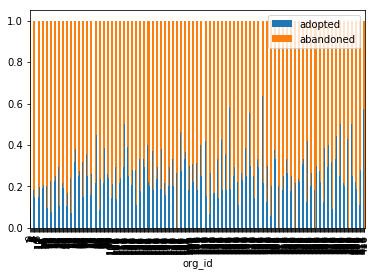

In [484]:
#Null Hypothesis: Org_Id is independent of adoption REJECTED
unique_users = user_engagement.drop_duplicates('user_id').groupby('org_id').sum()
org_df = unique_users[['visited','adopted']]
org_df['abandoned'] = org_df.visited - org_df.adopted
chi2, p, dof, expect = chi2_contingency(org_df.drop('visited', axis=1).as_matrix())
print("Chi-squared: {}, P-value: {}".format(chi2,p))
org_percent = (org_df.T/org_df.visited).T
org_percent.drop('visited', axis=1).plot.bar(stacked=True)
plt.show()